## Project One

## André de Paula Galhardo

### andregalhardo@tuta.io

## Predicting customer churn with Python

In [1]:
#!pip install keras
#!pip install tensorflow

In [2]:
# Imports 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc

2023-09-18 04:46:47.011574: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-18 04:46:47.054629: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-18 04:46:47.055732: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-18 04:46:47.686544: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Load
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


There are 21 variables in this dataset, where our goal is to predict the target variable, Churn.

## Data Analysis and transform

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Churn enconding for ML
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [7]:
df['Churn'].mean()

0.2653698707936959

The churn rate is 0.265%, which is a high value for the business to worry about customer churn.

In [8]:
#Handling missing values

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.TotalCharges.min()

' '

In [10]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)

In [11]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df.shape

(7043, 21)

In [13]:
df = df.dropna()

In [14]:
df.shape

(7032, 21)

In [15]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
#Transforming continuous variables

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [17]:
print('Mean:', np.mean(df['TotalCharges']))
print('Median:', np.median(df['TotalCharges']))

Mean: 2283.300440841866
Mode: 1397.475


<Axes: xlabel='TotalCharges'>

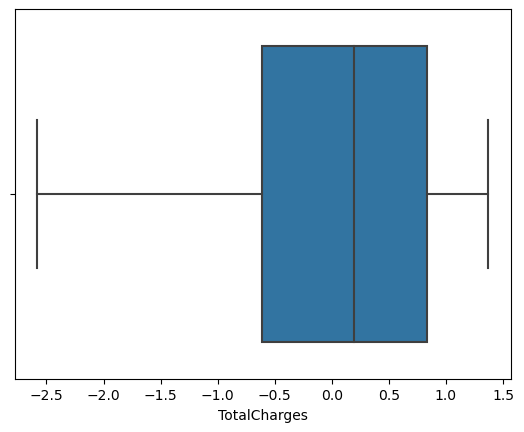

In [43]:
sns.boxplot(x='TotalCharges', data=df)

In [18]:
print('Mean:', np.mean(df['MonthlyCharges']))
print('Median:', np.median(df['MonthlyCharges']))

Mean: 64.79820819112628
Mode: 70.35


<Axes: xlabel='MonthlyCharges'>

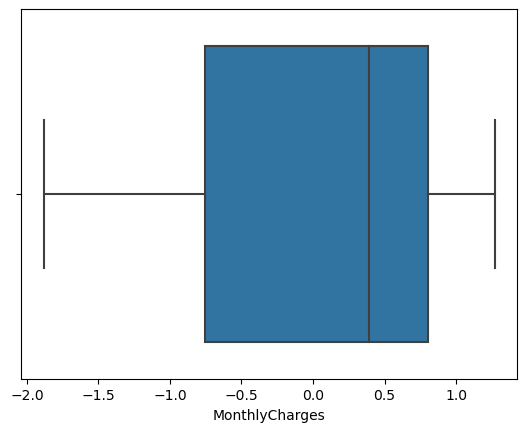

In [44]:
sns.boxplot(x='MonthlyCharges', data=df)

In [19]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


The 3 variables have different scales, ANN models perform better with scaled or normalized features.

In [20]:
df['MonthlyCharges'] = np.log(df['MonthlyCharges'])

In [21]:
df['MonthlyCharges'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean()) / df['MonthlyCharges'].std()

In [22]:
df['TotalCharges'] = np.log(df['TotalCharges'])

In [23]:
df['TotalCharges'] = (df['TotalCharges'] - df['TotalCharges'].mean()) / df['TotalCharges'].std()

In [24]:
df['tenure'] = (df['tenure'] - df['tenure'].mean()) / df['tenure'].std()

In [25]:
# Summary statistics again

df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-9.952853e-17,-9.851808e-16,-2.622097e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.280157e+00,-1.882268e+00,-2.579056e+00
25%,-9.542285e-01,-7.583727e-01,-6.080585e-01
50%,-1.394072e-01,3.885103e-01,1.950521e-01
75%,9.198605e-01,8.004829e-01,8.382338e-01
max,1.612459e+00,1.269576e+00,1.371323e+00


In [26]:
# One-Hot Enconding categorical variables

for col in list(df.columns):
    print(col, df[col].nunique())

customerID 7032
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 72
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1584
TotalCharges 6530
Churn 2


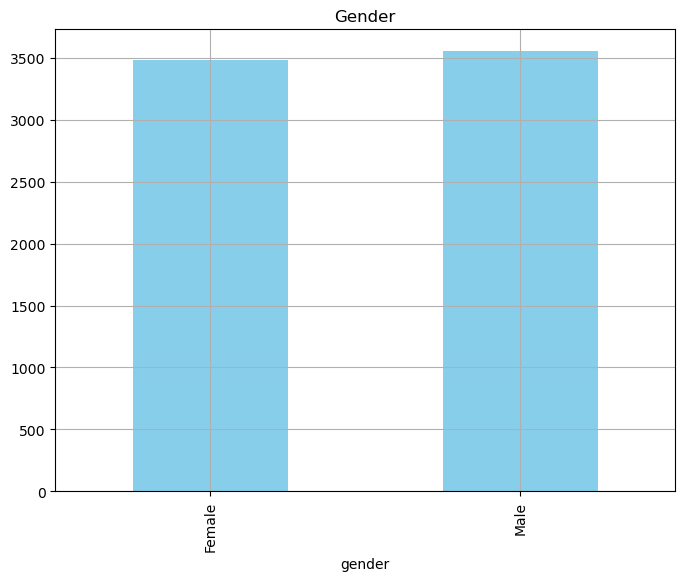

In [27]:
# Plot gender count

df.groupby('gender').count()['customerID'].plot(
kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Gender'
)
plt.show()

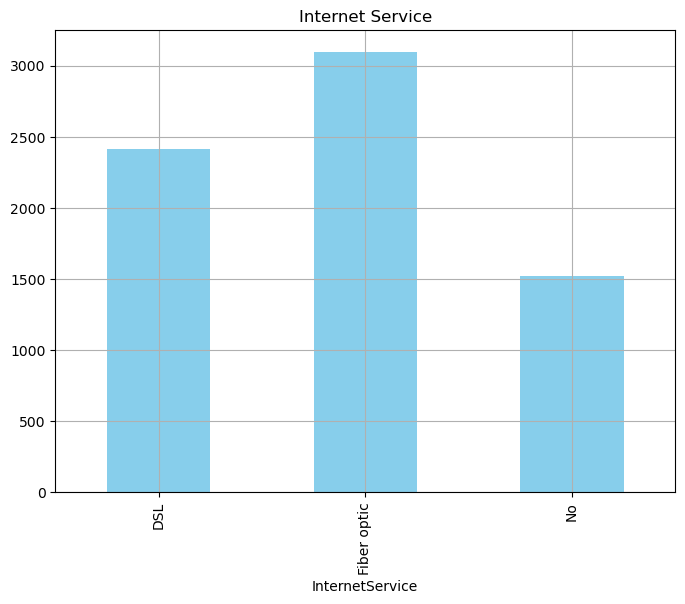

In [28]:
# Plot Internet Service count
df.groupby('InternetService').count()['customerID'].plot(
kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Internet Service'
)
plt.show()

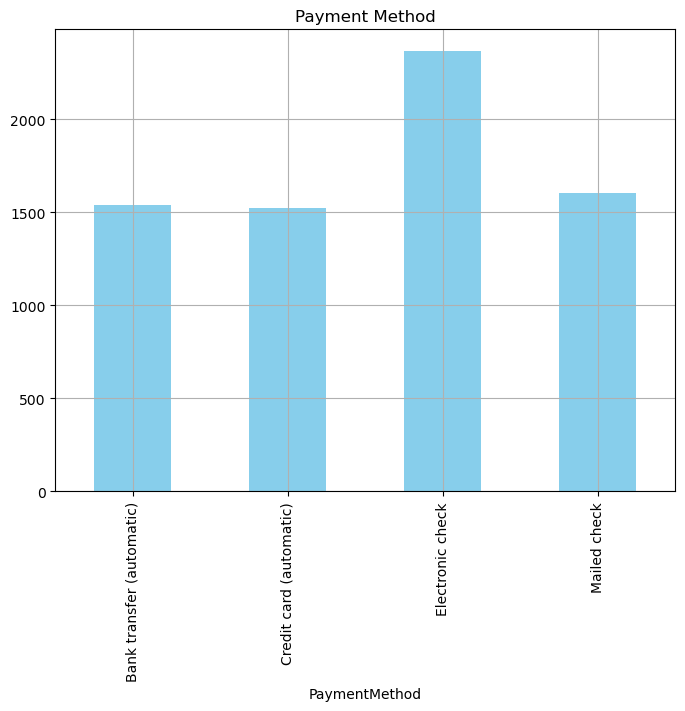

In [29]:
# Plot Payment Method count

df.groupby('PaymentMethod').count()['customerID'].plot(
kind='bar', color='skyblue', grid=True, figsize=(8,6), title='Payment Method'
)
plt.show()

In [30]:
# Apply one-hot encoding for these categorical variables
dummy_cols = []
sample_set = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy(deep=True)
for col in list(df.columns):
    if col not in ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'] and df[col].nunique() < 5:
        dummy_vars = pd.get_dummies(df[col])
        dummy_vars.columns = [col+str(x) for x in dummy_vars.columns]
        sample_set = pd.concat([sample_set, dummy_vars], axis=1)

In [31]:
sample_set.head(10)

,tenure,MonthlyCharges,TotalCharges,Churn,genderFemale,genderMale,SeniorCitizen0,SeniorCitizen1,PartnerNo,PartnerYes,...,StreamingMoviesYes,ContractMonth-to-month,ContractOne year,ContractTwo year,PaperlessBillingNo,PaperlessBillingYes,PaymentMethodBank transfer (automatic),PaymentMethodCredit card (automatic),PaymentMethodElectronic check,PaymentMethodMailed check
0,-1.280157,-1.054244,-2.281382,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0.064298,0.032896,0.389269,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,-1.239416,-0.061298,-1.452520,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0.512450,-0.467578,0.372439,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,-1.239416,0.396862,-1.234860,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5,-0.994970,0.974468,-0.147808,1,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
6,-0.424595,0.786142,0.409363,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
7,-0.913487,-1.059891,-0.791550,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
8,-0.180148,1.059269,0.696733,1,1,0,1,0,0,1,...,1,1,0,0,0,1,0,0,1,0
9,1.205048,0.009088,0.783956,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0


## ANN with Keras

In [36]:
model = Sequential()
model.add(Dense(16, input_dim=len(features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
target_var = 'Churn'
features = [x for x in list(sample_set.columns) if x != target_var]
X_train, X_test, y_train, y_test = train_test_split(
    sample_set[features],
    sample_set[target_var],
    test_size=0.3
)

In [39]:
model.fit(X_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
50/50 [==============================] - 0s 996us/step - loss: 0.7218 - accuracy: 0.5289
Epoch 2/50
50/50 [==============================] - 0s 994us/step - loss: 0.5793 - accuracy: 0.7477
Epoch 3/50
50/50 [==============================] - 0s 1ms/step - loss: 0.4824 - accuracy: 0.7686
Epoch 4/50
50/50 [==============================] - 0s 983us/step - loss: 0.4459 - accuracy: 0.7873
Epoch 5/50
50/50 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.7903
Epoch 6/50
50/50 [==============================] - 0s 986us/step - loss: 0.4279 - accuracy: 0.7960
Epoch 7/50
50/50 [==============================] - 0s 939us/step - loss: 0.4241 - accuracy: 0.7983
Epoch 8/50
50/50 [==============================] - 0s 989us/step - loss: 0.4215 - accuracy: 0.8007
Epoch 9/50
50/50 [==============================] - 0s 968us/step - loss: 0.4188 - accuracy: 0.7997
Epoch 10/50
50/50 [==============================] - 0s 954us/step - loss: 0.4175 - accuracy: 0.8021
Epo

## Model Evaluations

In [40]:
in_sample_preds = [round(x[0]) for x in model.predict(X_train)]
out_sample_preds = [round(x[0]) for x in model.predict(X_test)]
# Accuracy
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))
# Precision
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))
# Recall
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

66/66 [==============================] - 0s 665us/step
In-Sample Accuracy: 0.8131
Out-of-Sample Accuracy: 0.8175
In-Sample Precision: 0.7078
Out-of-Sample Precision: 0.6560
In-Sample Recall: 0.5408
Out-of-Sample Recall: 0.5489


In [41]:
in_sample_preds = [x[0] for x in model.predict(X_train)]
out_sample_preds = [x[0] for x in model.predict(X_test)]
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train,
in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test,
out_sample_preds)
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)
print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

66/66 [==============================] - 0s 633us/step
In-Sample AUC: 0.8657
Out-Sample AUC: 0.8487


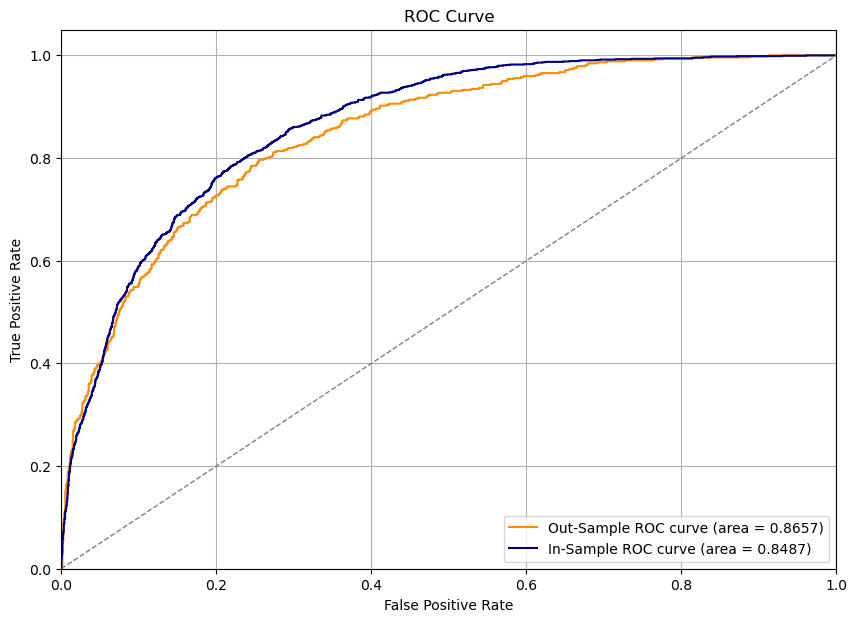

In [42]:
# Visualize AUC


plt.figure(figsize=(10,7))
plt.plot(
out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Along with the accuracy, precision, and recall measures that we looked at previously, the AUC and the ROC curve also suggest that the model captures and predicts those customers at churn risk pretty well. As you can see from these evaluation outputs, it is better to use the output of this model for identifying the customers who are likely to churn than simply guessing who they will be. By focusing on those customers with high churn probabilities from this model in your marketing strategies, you can try to retain those customers at churn risks in a more cost-effective way.

### References

https://www.kaggle.com/datasets/blastchar/telco-customer-churn
#### Hwang, Yoon Hyup - Hands-on data science for marketing - improve your marketing strategies with machine learning using Python and R-Packt Publishing (2019)